<a href="https://colab.research.google.com/github/Rahul-yadavgithub/Concepts-of-ML/blob/main/ML_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn plotly --quiet

In [ ]:
!pip install scikit-learn --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 73.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [ ]:
import os;
import matplotlib

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/competitions/rossmann-store-sales')

100%|██████████| 6.99M/6.99M [00:00<00:00, 981MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')

['store.csv', 'test.csv', 'sample_submission.csv', 'train.csv']

In [ ]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv', low_memory= False)

In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv('rossmann-store-sales/store.csv', low_memory = False)

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df = ross_df.merge(store_df, on = 'Store', how = 'left')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.shape

(1017209, 18)

In [ ]:
test_df = pd.read_csv('rossmann-store-sales/test.csv', low_memory = False)

In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
merged_test_df = test_df.merge(store_df, on = 'Store', how = 'left')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [ ]:
merged_df['Date']

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31
...,...
1017204,2013-01-01
1017205,2013-01-01
1017206,2013-01-01
1017207,2013-01-01


In [ ]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [ ]:
merged_df['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
merged_df['Date'].max()

Timestamp('2015-07-31 00:00:00')

In [ ]:
merged_test_df['Date'].min() , merged_test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

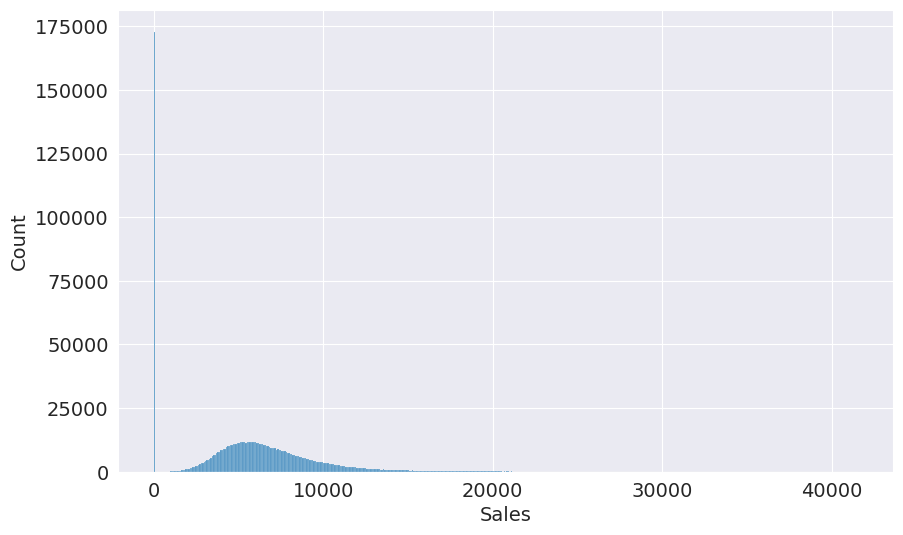

In [ ]:
sns.histplot(data = merged_df, x= 'Sales')

In [ ]:
merged_df['Open'].value_counts()

,count
Open,
1,844392
0,172817


In [ ]:
merged_df['Sales'].value_counts()

,count
Sales,
0,172871
5674,215
5558,197
5483,196
6049,195
...,...
23861,1
22756,1
24520,1


In [ ]:
merged_df['Sales'].value_counts().head(10)

,count
Sales,
0,172871
5674,215
5558,197
5483,196
6049,195
6214,195
5723,194
5449,192
5489,191


In [ ]:
merged_df['Sales'].value_counts()[0]

np.int64(172871)

In [ ]:
merged_df = merged_df[merged_df['Open'] == 1].copy()

In [ ]:
merged_df['Open'].value_counts()

,count
Open,
1,844392


<Axes: xlabel='Sales', ylabel='Count'>

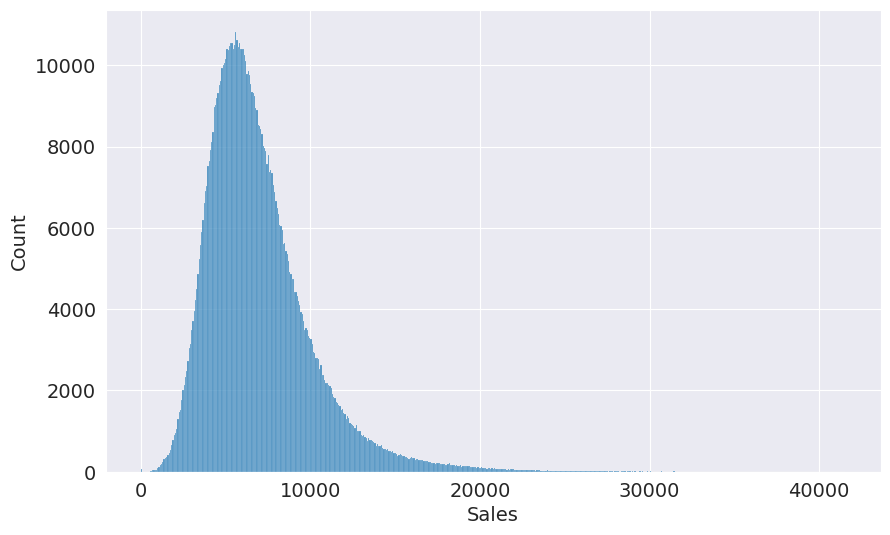

In [ ]:
sns.histplot(data = merged_df, x= 'Sales')

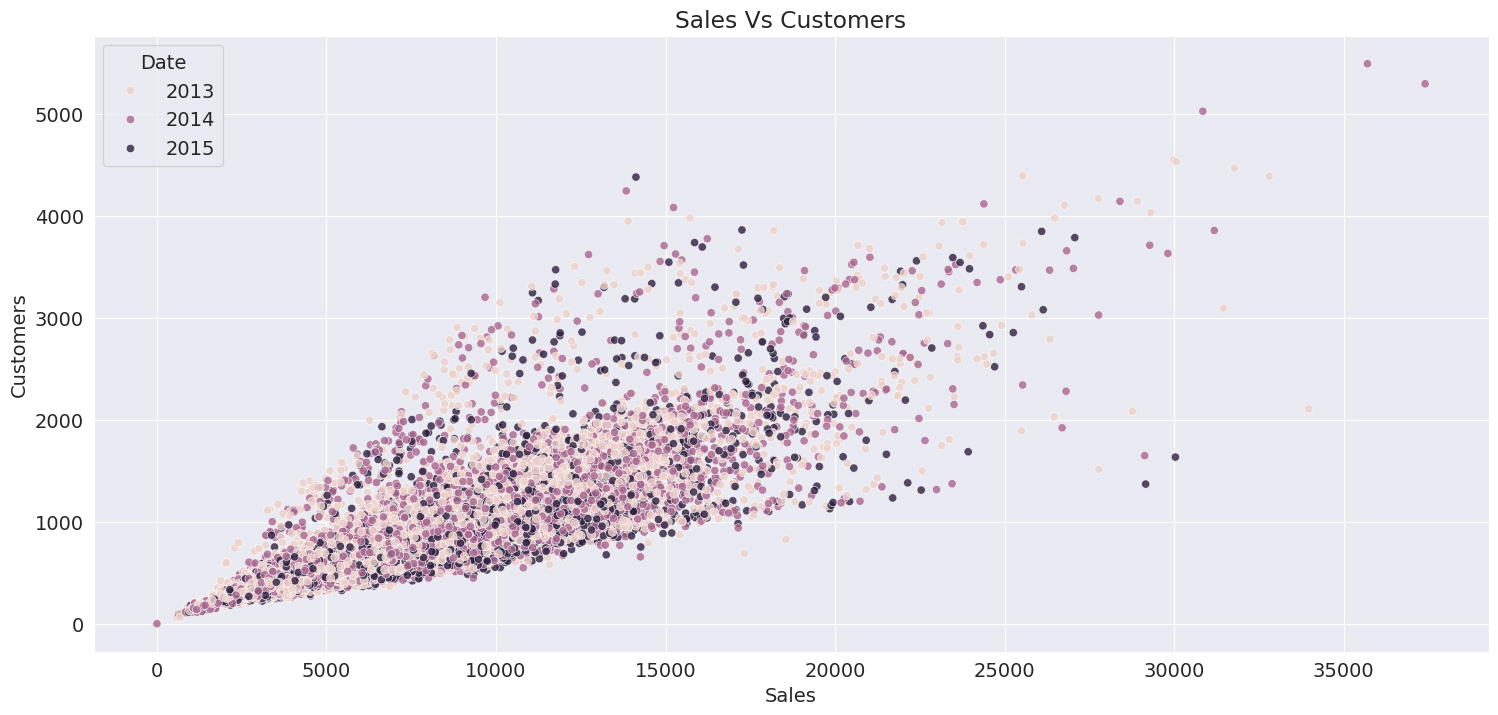

In [ ]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df['Sales'], y = temp_df['Customers'], hue =temp_df['Date'].dt.year, alpha = 0.8)
plt.title("Sales Vs Customers")
plt.show()

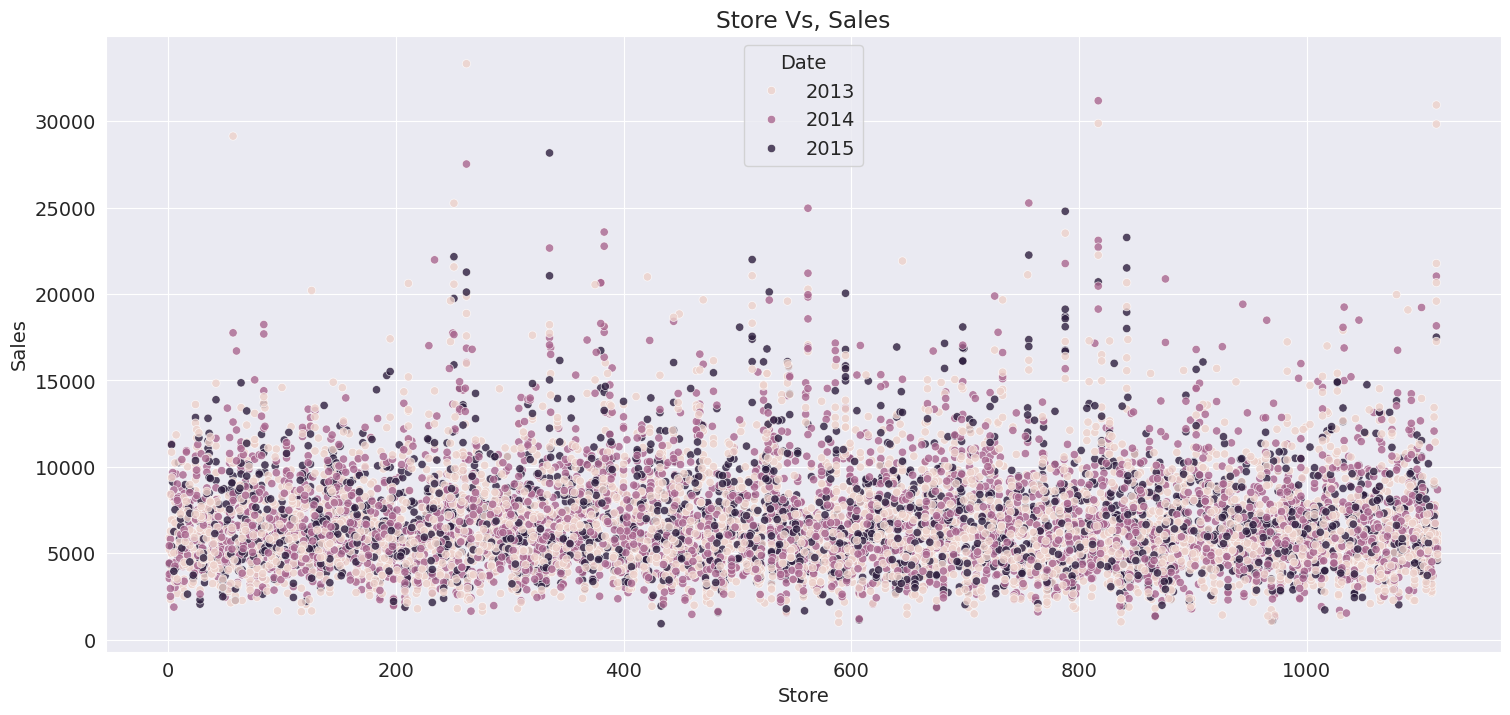

In [ ]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df['Store'], y= temp_df['Sales'], hue = temp_df['Date'].dt.year, alpha = 0.8)
plt.title('Store Vs, Sales')
plt.show()

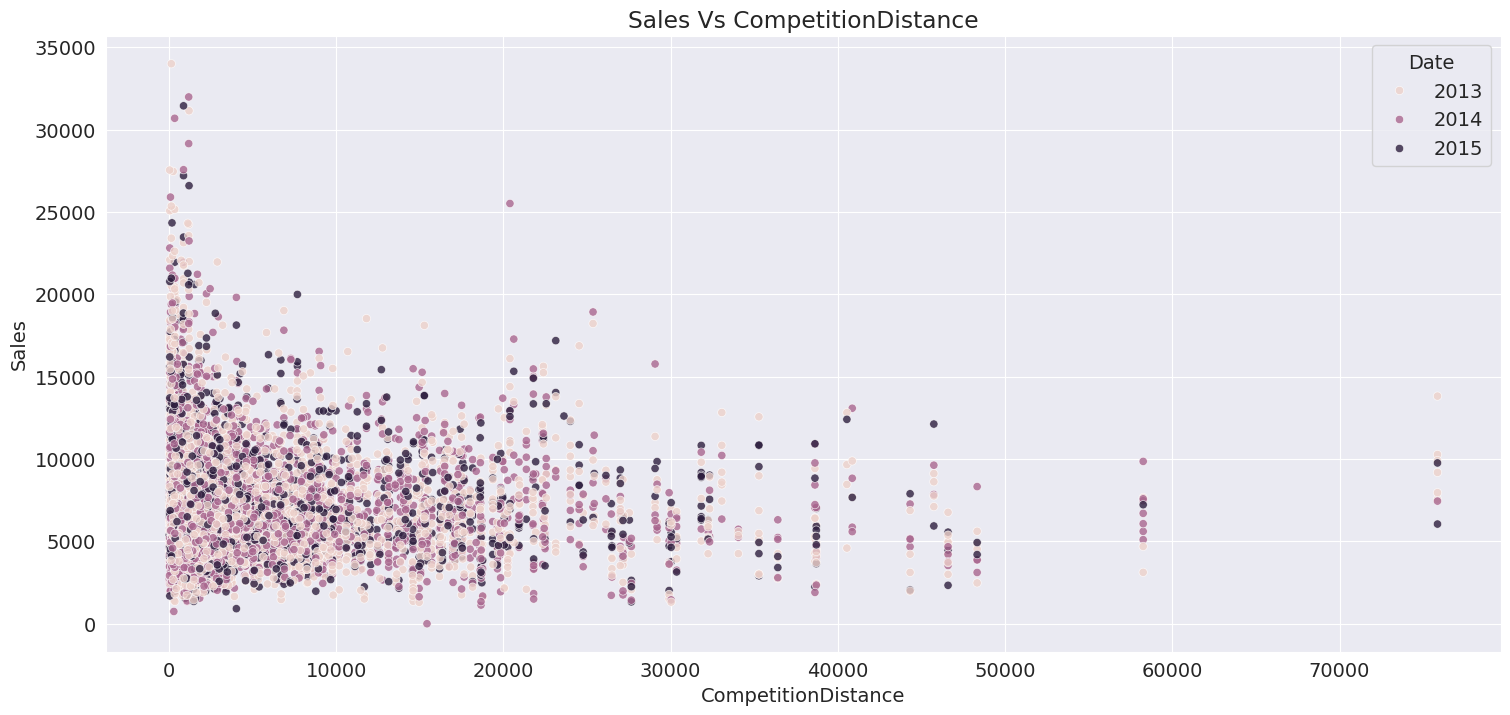

In [ ]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(y = temp_df['Sales'], x = temp_df['CompetitionDistance'], hue = temp_df['Date'].dt.year, alpha = 0.8)
plt.title('Sales Vs CompetitionDistance')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

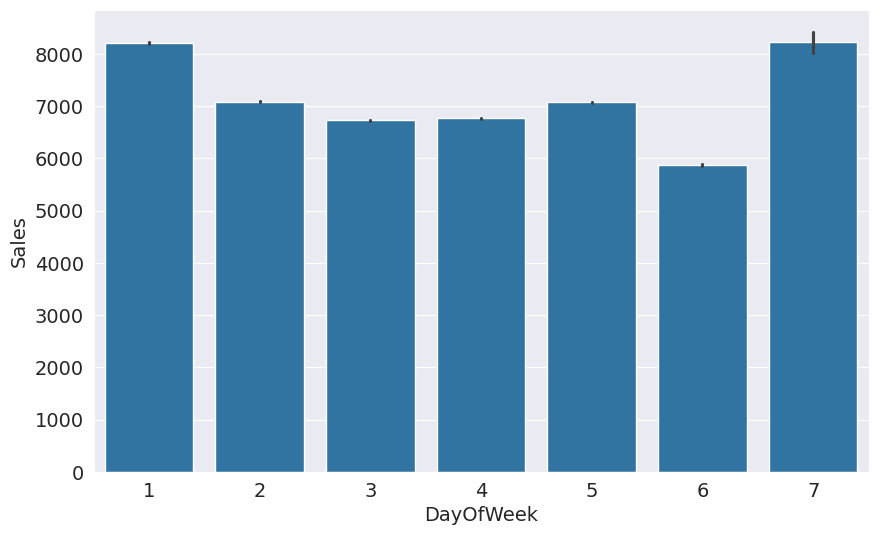

In [ ]:
sns.barplot(data = merged_df, x = 'DayOfWeek', y= 'Sales')

In [ ]:
sns.barplot(data = merged_df, x = 'Promo', y = 'Sales')

In [ ]:
sns.barplot(data = merged_df , x = 'SchoolHoliday', y ='Sales')

In [ ]:
sns.barplot(data = merged_df, x = 'StateHoliday', y = 'Sales')

In [ ]:
merged_df['StateHoliday'].value_counts()

In [ ]:
merged_df.select_dtypes(include = 'number').corr()['Sales'].sort_values(ascending = False)

In [ ]:
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year

In [ ]:
merged_test_df['Day'] = merged_test_df['Date'].dt.day
merged_test_df['Month'] = merged_test_df['Date'].dt.month
merged_test_df['Year'] = merged_test_df['Date'].dt.year

In [ ]:
merged_df['Day']

In [ ]:
sns.barplot(data = merged_df, x = 'Year', y ='Sales')

In [ ]:
sns.barplot(data = merged_df, x= 'Month', y= 'Sales')

In [ ]:
sns.barplot(data = merged_df, x = 'Day', y= 'Sales')

In [ ]:
len(merged_df)

In [ ]:
train_size = int(.75*len(merged_df))
train_size

In [ ]:
sorted_df = merged_df.sort_values('Date')

In [ ]:
sorted_df

In [ ]:
train_df = sorted_df[:train_size]
val_df = sorted_df[train_size:]

In [ ]:
train_df

In [ ]:
val_df

In [ ]:
train_df['Date'].min(), train_df['Date'].max()

In [ ]:
val_df['Date'].min(), train_df['Date'].max()

In [ ]:
input_cols = ['Store', 'DayOfWeek','Promo', 'StateHoliday','StoreType','Assortment','Day', 'Month', 'Year']

In [ ]:
target_col = 'Sales'

In [ ]:
merged_df[input_cols].nunique()

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
test_inputs

In [ ]:
test_inputs.nunique()

In [ ]:
train_inputs.nunique()

In [ ]:
val_inputs.nunique()

In [ ]:
val_inputs

In [ ]:
train_inputs

In [ ]:
train_inputs.info()

In [ ]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek','Promo', 'StateHoliday','StoreType','Assortment']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
imputer.fit(train_inputs[numeric_cols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_inputs[numeric_cols])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown ='ignore')

In [ ]:
encoder.fit(train_inputs[categorical_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'Promo_0',
 'Promo_1',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df['Sales'].mean())

In [ ]:
train_preds = return_mean(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_error = mean_squared_error(train_preds, train_targets)

In [ ]:
np.sqrt(train_error)

np.float64(3082.450443277419)

In [ ]:
val_error = mean_squared_error(return_mean(X_val), val_targets)

In [ ]:
np.sqrt(val_error)

np.float64(3168.6033635047716)

In [ ]:
def random_guess(inputs):
  low, high = merged_df['Sales'].min(), merged_df['Sales'].max()
  return np.random.random(len(inputs))*(high-low) + low

In [ ]:
train_preds = random_guess(X_train[numeric_cols])
train_preds

array([29286.51372018, 18525.45327617, 21162.88200465, ...,
       40124.55249879, 29720.89483135,  8803.77011556])

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
train_error = root_mean_squared_error(train_preds, train_targets)

In [ ]:
train_error

18620.679713917918

In [ ]:
val_error = root_mean_squared_error(random_guess(X_val[numeric_cols]), val_targets)

In [ ]:
val_error

18389.944981703266

In [ ]:
grouped_means = train_df.groupby(['Store', 'Month', 'Year'])['Sales'].mean()

In [ ]:
grouped_means

Store  Month  Year
1      1      2013    4939.653846
              2014    4569.769231
       2      2013    5219.625000
              2014    4601.416667
       3      2013    5806.760000
                         ...     
1115   10     2014    6298.961538
       11     2013    6130.500000
              2014    7217.920000
       12     2013    7678.916667
              2014    8056.222222
Name: Sales, Length: 25661, dtype: float64

In [ ]:
def predict_sales(inputs):
    if inputs['Open'] == 0:
        return 0
    else:
        key = (inputs['Store'], inputs['Month'], inputs['Year'] - 1)
        if key in grouped_means:
            return grouped_means[key]
        else:
            return train_targets.mean()


In [ ]:
val_preds = val_df.apply(predict_sales, axis=1)

In [ ]:
val_preds

In [ ]:
import matplotlib.pyplot as plt

val_preds.hist(bins=50)
plt.title("Distribution of Predicted Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
val_preds.describe()

In [ ]:
val_error = root_mean_squared_error(val_preds, val_targets)

In [ ]:
val_error

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, train_targets)

In [ ]:
X_train.columns

In [ ]:
linreg.coef_

In [ ]:
train_preds = linreg.predict(X_train)
train_preds

In [ ]:
train_error = root_mean_squared_error(train_preds, train_targets)
train_error

In [ ]:
val_preds = linreg.predict(X_val)
val_preds

In [ ]:
val_error = root_mean_squared_error(val_preds, val_targets)
val_error

In [ ]:
def try_model(model):
  #Fit Model
  model.fit(X_train, train_targets)

  # Generate Prediction
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)

  #Compute RMSE
  train_error = root_mean_squared_error(train_preds, train_targets)
  val_error = root_mean_squared_error(val_preds, val_targets)

  return train_error, val_error

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor

In [ ]:
try_model(LinearRegression())

In [ ]:
try_model(Ridge())

In [ ]:
try_model(Lasso())

In [ ]:
try_model(ElasticNet())

In [ ]:
try_model(SGDRegressor())

In [ ]:
try_model(HuberRegressor())

In [ ]:
# Some Tree Based Model

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, plot_tree

In [ ]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

In [ ]:
plt.figure(figsize = (40,20))
plot_tree(tree,max_depth =2, feature_names = X_train.columns, filled = True)

In [ ]:
tree2 = ExtraTreeRegressor(random_state = 42)
try_model(tree2)

In [ ]:
plt.figure(figsize = (40,20))
plot_tree(tree2, max_depth =2, feature_names = X_train.columns, filled = True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor

In [ ]:
randomF = RandomForestRegressor(random_state = 42, n_jobs = -1)
try_model(randomF)

(474.9198974666898, 1371.7321923469985)

In [ ]:
gradientM = GradientBoostingRegressor(random_state = 42,n_estimators = 40, learning_rate =0.1, max_depth = 3)
try_model(gradientM)

(2627.448307061113, 2710.8785937680314)

In [ ]:
AdaBReg = AdaBoostRegressor(random_state = 42, n_estimators = 40, learning_rate = 0.1)
try_model(AdaBReg)

(2796.664651344103, 2833.405559804877)

In [ ]:
BaggingReg = BaggingRegressor(random_state = 42, n_estimators = 40)
try_model(BaggingReg)

(490.9516798788055, 1378.9857285017351)